In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def find_root():
    p = Path.cwd()
    for _ in range(5):
        if (p/'results'/'outputs'/'01_encoded.csv').exists() or (p/'data'/'raw'/'student_depression_dataset.csv').exists():
            return p if (p/'results').exists() else p
        p = p.parent
    return Path.cwd()

ROOT = find_root()
VIS_DIR = ROOT/'results'/'eda_visualizations'
OUT_DIR = ROOT/'results'/'outputs'
df = pd.read_csv(OUT_DIR/'01_encoded.csv')

TARGET = 'Depression'
print(df.shape)
num_cols = df.select_dtypes(include=[np.number]).columns.drop(TARGET, errors='ignore')
df.head()

(27901, 121)


,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Financial Stress_1.0,Financial Stress_2.0,Financial Stress_3.0,Financial Stress_4.0,Financial Stress_5.0,Financial Stress_?
0,2,1,33.0,5.0,0.0,8.97,2.0,0.0,1,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,8,0,24.0,2.0,0.0,5.90,5.0,0.0,0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,26,1,31.0,3.0,0.0,7.03,5.0,0.0,0,9.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,30,0,28.0,3.0,0.0,5.59,2.0,0.0,1,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,32,0,25.0,4.0,0.0,8.13,3.0,0.0,1,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


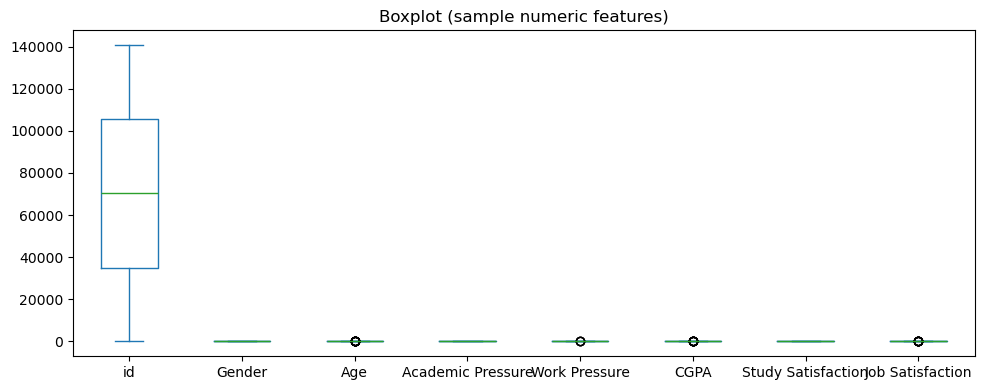

In [3]:
sel = num_cols[:8]
ax = df[sel].plot(kind='box', figsize=(10,4), title='Boxplot (sample numeric features)')
plt.tight_layout()
plt.savefig(VIS_DIR/'05_outliers_boxplot_before.png', dpi=150)

In [4]:
def iqr_winsorize(s, k=1.5):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    return s.clip(q1 - k*iqr, q3 + k*iqr)

df_w = df.copy()
for c in num_cols:
    df_w[c] = iqr_winsorize(df_w[c])

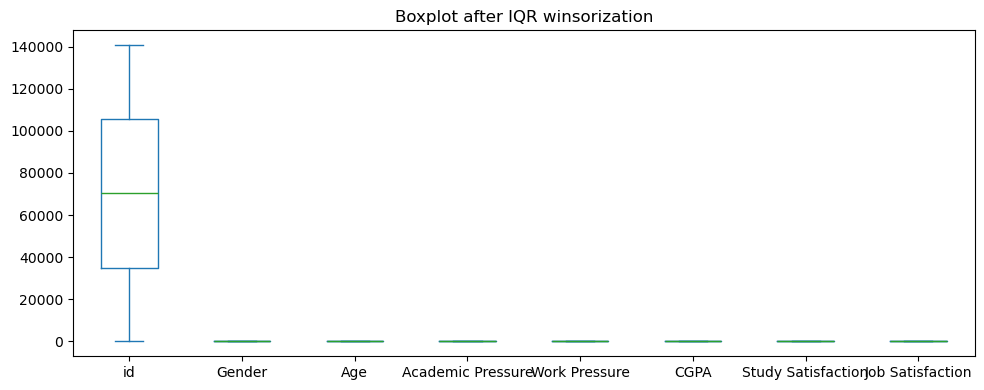

In [5]:
df_w[sel].plot(kind='box', figsize=(10,4), title='Boxplot after IQR winsorization')
plt.tight_layout()
plt.savefig(VIS_DIR/'06_outliers_boxplot_after.png', dpi=150)

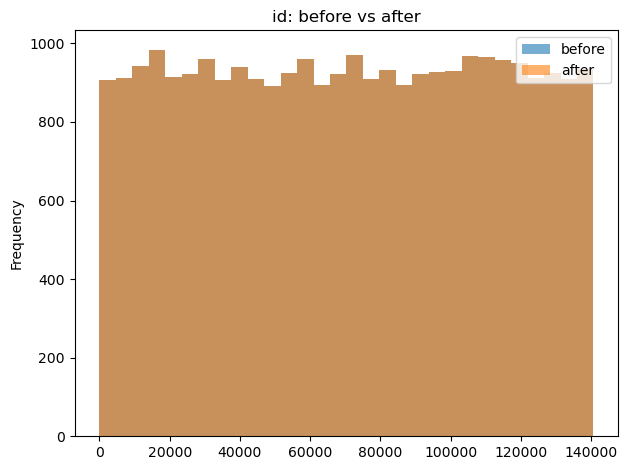

In [6]:
# histogram before vs after (one feature)
feat = sel[0] if len(sel) else None
if feat:
    plt.figure()
    df[feat].plot(kind='hist', alpha=0.6, bins=30, label='before')
    df_w[feat].plot(kind='hist', alpha=0.6, bins=30, label='after')
    plt.legend(); plt.title(f'{feat}: before vs after')
    plt.tight_layout()
    plt.savefig(VIS_DIR/'07_outliers_hist_before_after.png', dpi=150)


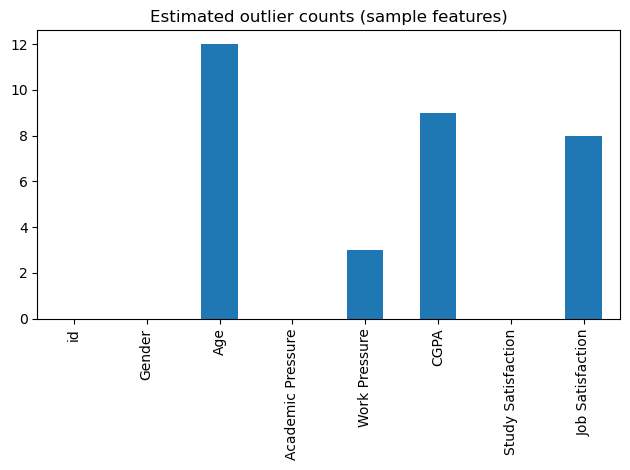

In [7]:
# outlier counts (before)
outlier_counts = {}
for c in sel:
    q1, q3 = df[c].quantile(0.25), df[c].quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    outlier_counts[c] = ((df[c] < lower) | (df[c] > upper)).sum()

pd.Series(outlier_counts).plot(kind='bar', title='Estimated outlier counts (sample features)')
plt.tight_layout()
plt.savefig(VIS_DIR/'08_outliers_counts.png', dpi=150)

In [8]:
# CELL 5: Save
out_path = OUT_DIR/'02_outliers_winsorized.csv'
df_w.to_csv(out_path, index=False)
out_path

WindowsPath('D:/UNI Projects/Depression_Detector/results/outputs/02_outliers_winsorized.csv')